In [2]:
# Packages

library(tidyverse)
library(glue)

# Data directory

data_directory = 'Supplemental_Figure11_data'

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Supplemental Figure 11A**

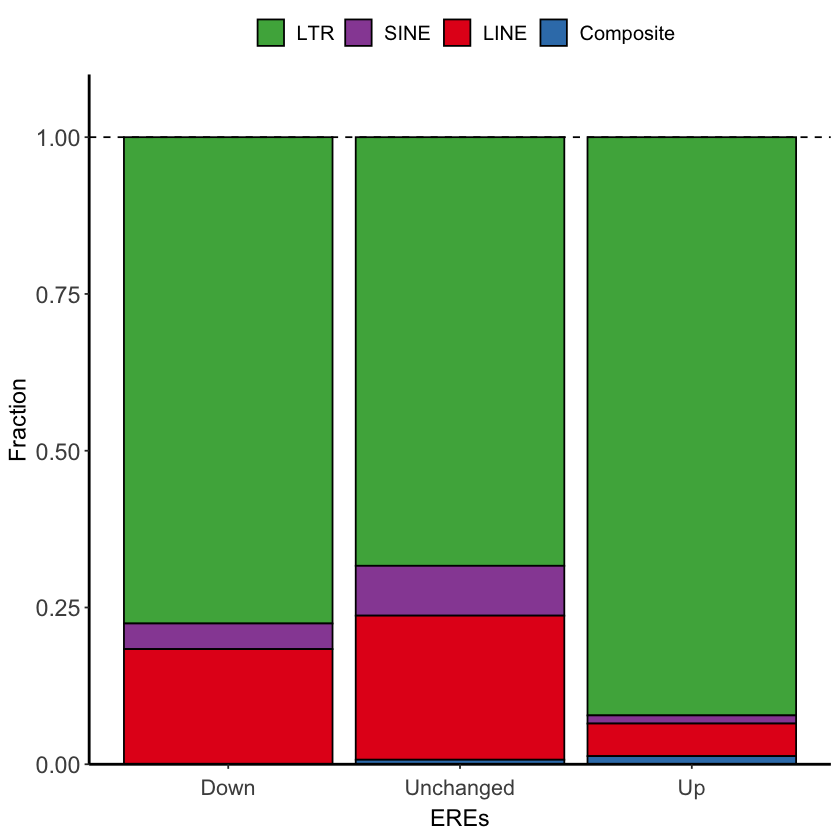

In [3]:
r = "#e41a1c"
b = '#377eb8'
g = "#4daf4a"
p = "#984ea3"

input = read.csv(glue("{data_directory}/class_fraction.csv"))

input$condition_A = factor(input$condition_A, levels = c('LTR', 'SINE', 'LINE', 'Retroposon'))

bar_chart = ggplot(input, aes(x = condition_B, y = percent, fill = condition_A)) + 
  geom_col(colour = 'black', position = 'fill') +
  scale_y_continuous(expand = expansion(mult = c(0, .1))) +
  xlab('EREs') +
  ylab('Fraction') +
  labs(fill= "") +
  scale_x_discrete(labels = c('Down', 'Unchanged', 'Up')) +
  geom_hline(yintercept = 1, linetype = 'dashed') +
  scale_fill_manual(labels = c('LTR', 'SINE', 'LINE', 'Composite'), values = c(g, p, r, b))

bar_chart + theme_bw() + theme(plot.title = element_text(face = 'bold', size = 20),
                               plot.subtitle = element_text(size = 14),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               axis.text.x = element_text(size = 13, margin = margin(t = 6)),
                               axis.text.y = element_text(size = 14),
                               axis.title.y = element_text(size = 14),
                               axis.title.x = element_text(size = 14, margin = margin(t = 6)),
                               axis.line = element_line(size = 0.8),
                               panel.border = element_blank(),
                               legend.text = element_text(size = 12),
                               legend.title = element_text(size = 14),
                               legend.position="top")


**Supplemental Figure 11B**

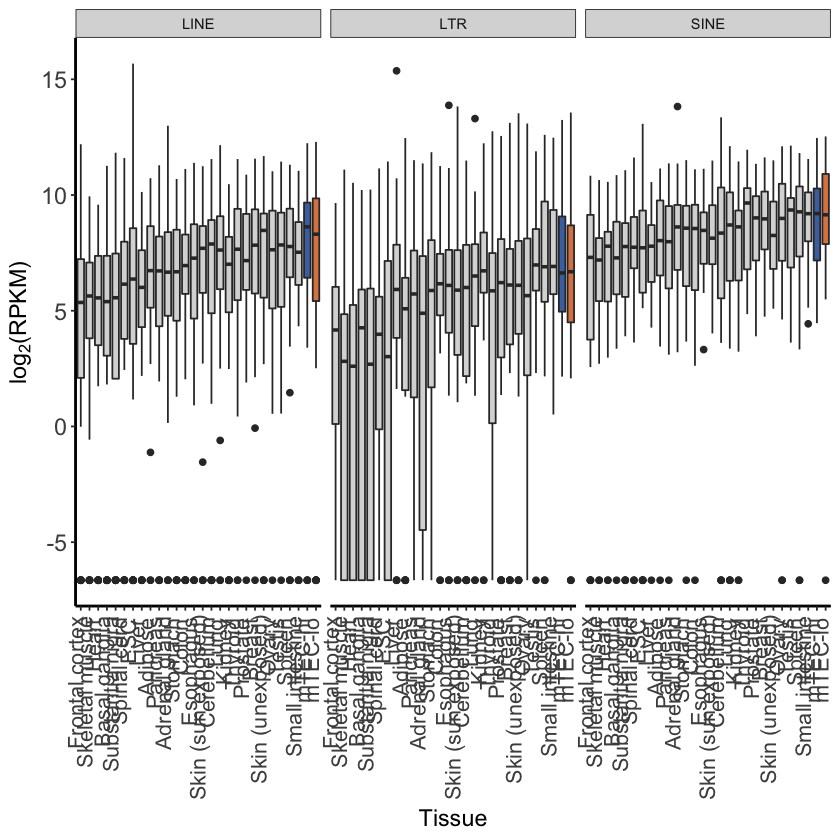

In [7]:
input = read.csv(glue("{data_directory}/ereMAP_RPKM.csv"))

input = mutate(input, color = case_when(tissue == 'mTEC-hi' ~ '#4c72b0ff',
                                 tissue == 'mTEC-lo' ~ '#dd8452ff',
                                 T ~ 'white'))

box_plot = ggplot(data = input, 
                  aes(x = reorder(tissue,RPKM, FUN = median), 
                      y = log2(RPKM+0.01), fill = color)) +
  geom_boxplot() +
  xlab('Tissue') +
  ylab(expression('log'[2]*'(RPKM)')) +
  scale_fill_manual(values = c('#4c72b0ff', '#dd8452ff', '#D9D9D9')) +
  facet_grid(. ~ class)

box_plot + theme_bw() + theme(plot.title = element_text(face = 'bold', size = 20),
                               plot.subtitle = element_text(size = 14),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               axis.text.x = element_text(size = 13, 
                                                          angle = 90,
                                                          hjust=0.97, vjust=0.2),
                               axis.text.y = element_text(size = 14),
                               axis.title.y = element_text(size = 14),
                               axis.title.x = element_text(size = 14, margin = margin(t = 6)),
                               axis.line = element_line(size = 0.8),
                               panel.border = element_blank(),
                               legend.position = 'none') 